# Dimensionaltiy Reduction Comparison and Stuff

Still have some data to add.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [22]:
# pip install --upgrade seaborn


Mmmmm colors.

In [23]:
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

## The Data

In [101]:
df = pd.read_pickle('./resultsTREC.pkl') #results
len(df)
df

,model,chunk_size,overlap,embedding_dim,precision,recall,f1,query_size
0,contriever,100,0.05,1,0.000695,1.0,0.001389,"(25, 50)"
1,contriever,100,0.05,3,0.382690,1.0,0.553544,"(25, 50)"
2,contriever,100,0.05,5,0.301008,1.0,0.462730,"(25, 50)"
3,contriever,100,0.05,7,0.275287,1.0,0.431725,"(25, 50)"
4,contriever,100,0.05,9,0.257560,1.0,0.409619,"(25, 50)"
...,...,...,...,...,...,...,...,...
16195,SGPT-125M-weightedmean-nli-bitfit,500,0.30,307,1.000000,1.0,1.000000,"(50, 100)"
16196,SGPT-125M-weightedmean-nli-bitfit,500,0.30,326,1.000000,1.0,1.000000,"(50, 100)"
16197,SGPT-125M-weightedmean-nli-bitfit,500,0.30,345,1.000000,1.0,1.000000,"(50, 100)"
16198,SGPT-125M-weightedmean-nli-bitfit,500,0.30,364,1.000000,1.0,1.000000,"(50, 100)"


In [70]:
import pandas as pd

results =df

best_precision_rows = results.groupby('model')['precision'].idxmax()
best_recall_rows = results.groupby('model')['recall'].idxmax()
best_f1_rows = results.groupby('model')['f1'].idxmax()

best_precision_settings = results.loc[best_precision_rows, ['model', 'chunk_size', 'overlap']]
best_recall_settings = results.loc[best_recall_rows, ['model', 'chunk_size', 'overlap']]
best_f1_settings = results.loc[best_f1_rows, ['model', 'chunk_size', 'overlap']]

print("Best Settings for Precision:")
print(best_precision_settings)
print("\nBest Settings for Recall:")
print(best_recall_settings)
print("\nBest Settings for F1:")
print(best_f1_settings)


Best Settings for Precision:
                                   model  chunk_size  overlap
12601  SGPT-125M-weightedmean-nli-bitfit         400     0.05
7205                    all-MiniLM-L6-v2         400     0.05
1852                          contriever         400     0.10

Best Settings for Recall:
                                   model  chunk_size  overlap
10800  SGPT-125M-weightedmean-nli-bitfit         100     0.05
5400                    all-MiniLM-L6-v2         100     0.05
0                             contriever         100     0.05

Best Settings for F1:
                                   model  chunk_size  overlap
12601  SGPT-125M-weightedmean-nli-bitfit         400     0.05
7205                    all-MiniLM-L6-v2         400     0.05
1852                          contriever         400     0.10


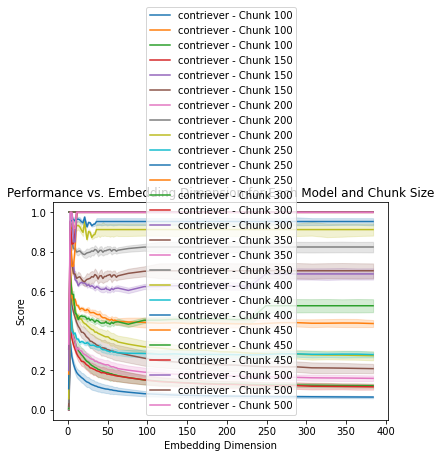

In [78]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming `results` is your DataFrame with columns model, chunk_size, overlap, embedding_dim, precision, recall, f1, query_size
# # df = df[df['model'] == 'contriever']
# # Filter relevant columns
# df_plot = df[['model', 'chunk_size', 'embedding_dim', 'precision', 'recall', 'f1']]

# # Iterate over unique models and chunk sizes
# for model in df_plot['model'].unique():
#     for chunk_size in df_plot['chunk_size'].unique():
#         df_subset = df_plot[(df_plot['model'] == model) & (df_plot['chunk_size'] == chunk_size)]
        
#         # Line plot for precision, recall, and f1
#         sns.lineplot(x='embedding_dim', y='precision', data=df_subset, label=f'{model} - Chunk {chunk_size}')
#         sns.lineplot(x='embedding_dim', y='recall', data=df_subset, label=f'{model} - Chunk {chunk_size}')
#         sns.lineplot(x='embedding_dim', y='f1', data=df_subset, label=f'{model} - Chunk {chunk_size}')

# plt.xlabel('Embedding Dimension')
# plt.ylabel('Score')
# plt.title('Performance vs. Embedding Dimension for Each Model and Chunk Size')
# plt.legend()
# plt.show()


<AxesSubplot:xlabel='chunk_size', ylabel='precision'>

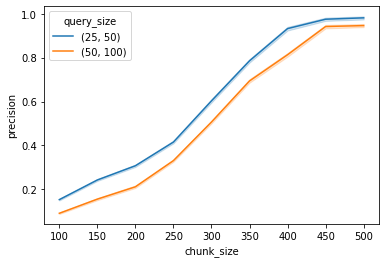

In [104]:
sns.lineplot(data=df, x='chunk_size', y='precision', hue='query_size')

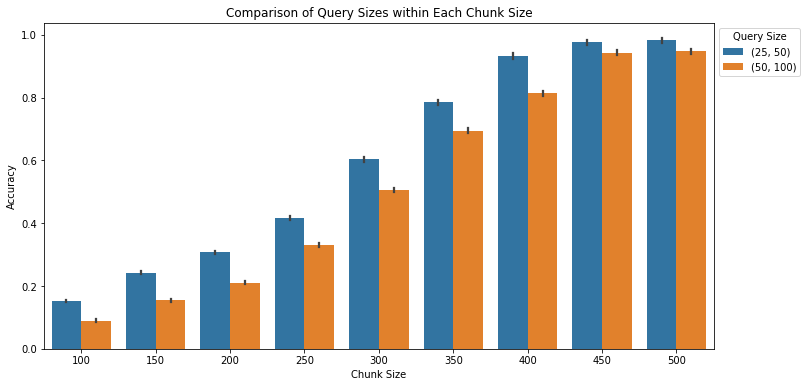

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='chunk_size', y='precision', hue='query_size', data=df)
plt.title('Comparison of Query Sizes within Each Chunk Size')
plt.xlabel('Chunk Size')
plt.ylabel('Accuracy')
plt.legend(title='Query Size', bbox_to_anchor=(1, 1))
plt.show()


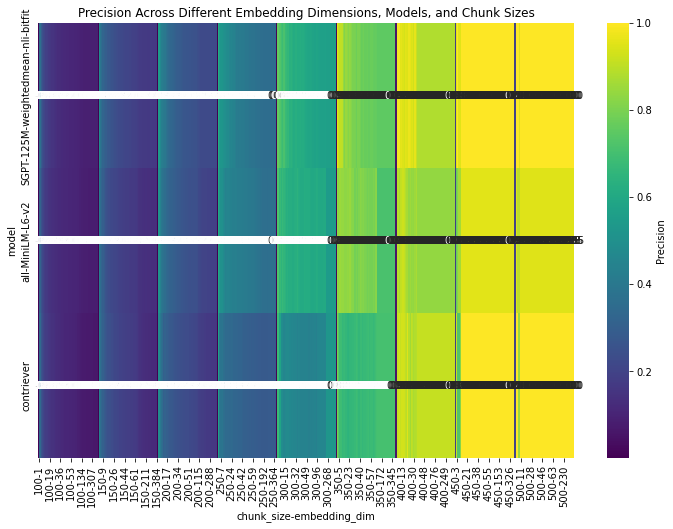

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results = df
df_heatmap = results[['model', 'chunk_size', 'embedding_dim', 'precision']]

heatmap_data = df_heatmap.pivot_table(index='model', columns=['chunk_size', 'embedding_dim'], values='precision')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.2f', cbar_kws={'label': 'Precision'})
plt.title('Precision Across Different Embedding Dimensions, Models, and Chunk Sizes')
plt.show()


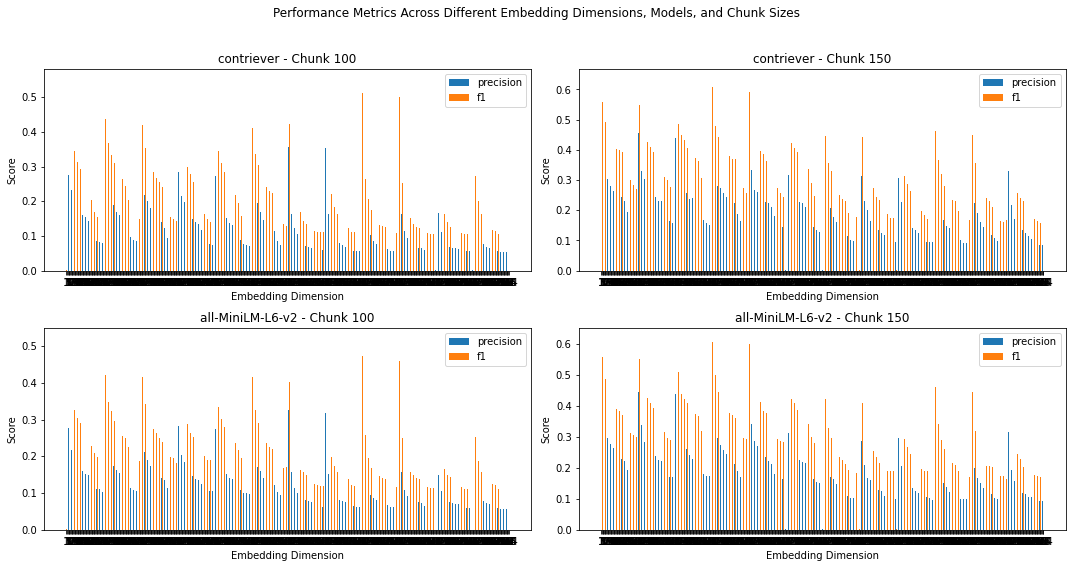

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df_plot = results[['model', 'chunk_size', 'embedding_dim', 'precision', 'recall', 'f1']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
fig.suptitle('Performance Metrics Across Different Embedding Dimensions, Models, and Chunk Sizes')

for i, model in enumerate(df_plot['model'].unique()[:2]):
    for j, chunk_size in enumerate(df_plot['chunk_size'].unique()[:2]):
        ax = axes[i, j]
        df_subset = df_plot[(df_plot['model'] == model) & (df_plot['chunk_size'] == chunk_size)]

        metrics = ['precision', 'f1'] #'recall',
        x_values = np.arange(len(df_subset['embedding_dim']))
        
        for idx, metric in enumerate(metrics):
            ax.bar(x_values + idx * 0.2, df_subset[metric], width=0.2, label=metric)

        ax.set_title(f'{model} - Chunk {chunk_size}')
        ax.set_xticks(x_values + 0.2)
        ax.set_xticklabels(df_subset['embedding_dim'])
        ax.set_xlabel('Embedding Dimension')
        ax.set_ylabel('Score')
        ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the title
plt.show()


In [59]:

df_mean_metrics = df.groupby('model')[['precision', 'f1']].mean().reset_index()

# Displaying the DataFrame with average metrics
print("Average Metrics Table:")
print(df_mean_metrics)


Average Metrics Table:
                               model  precision        f1
0  SGPT-125M-weightedmean-nli-bitfit   0.584685  0.675651
1                   all-MiniLM-L6-v2   0.559777  0.656208
2                         contriever   0.536323  0.630515


<AxesSubplot:xlabel='chunk_size', ylabel='f1'>

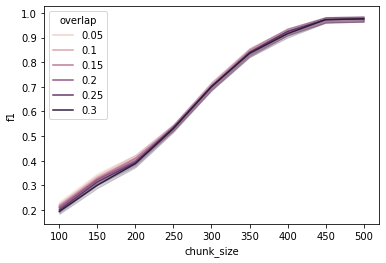

In [60]:
sns.lineplot(data=df, x='chunk_size', y='f1', hue='overlap')

<AxesSubplot:xlabel='model', ylabel='f1'>

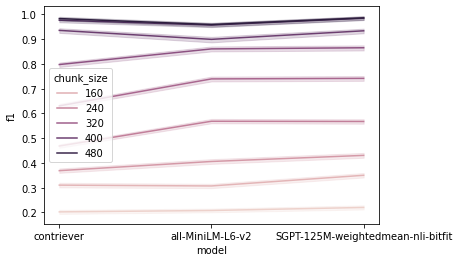

In [61]:
sns.lineplot(data=df, x='model', y='f1', hue='chunk_size')

<AxesSubplot:xlabel='chunk_size', ylabel='precision'>

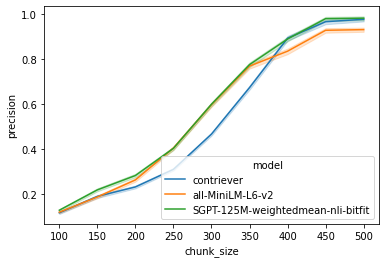

In [62]:
sns.lineplot(data=df, x='chunk_size', y='precision', hue='model')


<AxesSubplot:xlabel='embedding_dim', ylabel='f1'>

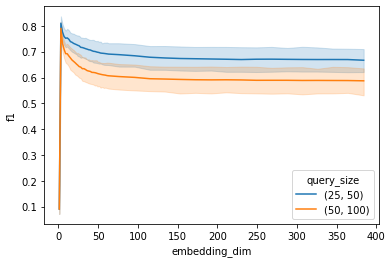

In [63]:
# sns.scatterplot(data=df, x='embedding_dim', y='accuracy', hue='query_size')
sns.lineplot(data=df, x='embedding_dim', y='f1', hue='query_size')

<AxesSubplot:xlabel='embedding_dim', ylabel='precision'>

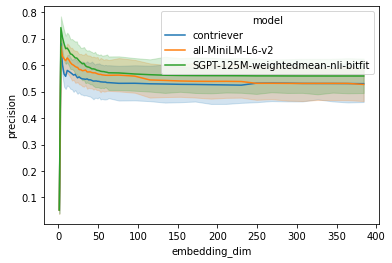

In [65]:
sns.lineplot(data=df, x='embedding_dim', y='precision', hue='model')

<AxesSubplot:xlabel='embedding_dim', ylabel='precision'>

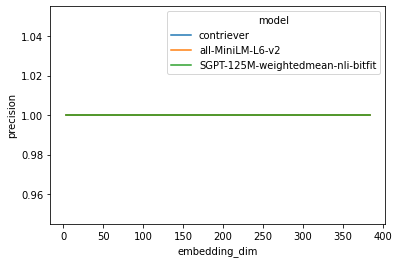

In [56]:
sns.lineplot(data=df, x='embedding_dim', y='precision', hue='model')

<AxesSubplot:xlabel='embedding_dim', ylabel='f1'>

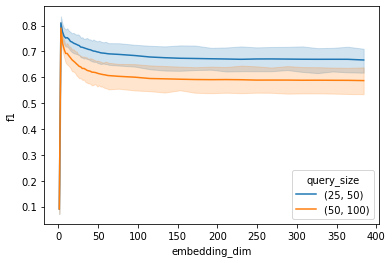

In [44]:
sns.lineplot(data=df, x='embedding_dim', y='f1', hue='query_size')

<AxesSubplot:xlabel='embedding_dim', ylabel='precision'>

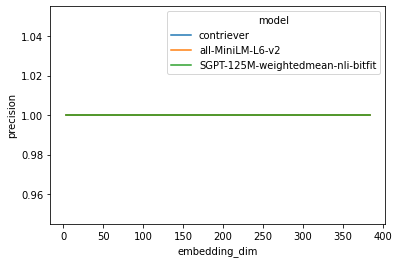

In [55]:
sns.lineplot(data=df, x='embedding_dim', y='precision', hue='model')

<AxesSubplot:xlabel='embedding_dim', ylabel='f1'>

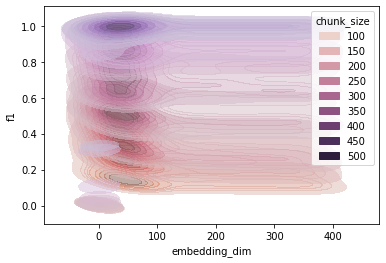

In [46]:
sns.kdeplot(data=df,
            x='embedding_dim',
            y='f1',
            hue='chunk_size',
            fill=True,
            common_norm=False,
            alpha=.5)

<AxesSubplot:xlabel='embedding_dim', ylabel='precision'>

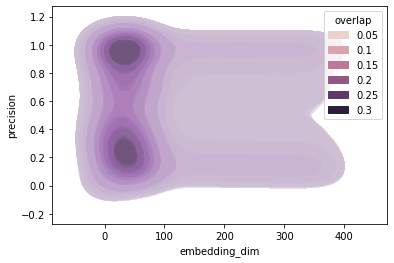

In [47]:
sns.kdeplot(data=df,
            x='embedding_dim',
            y='precision',
            hue='overlap',
            fill=True,
            common_norm=False,
            alpha=.5)

<AxesSubplot:xlabel='chunk_size', ylabel='f1'>

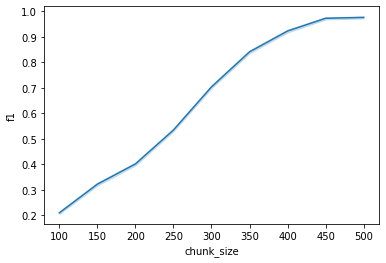

In [48]:
sns.lineplot(data=df, x='chunk_size', y='f1')


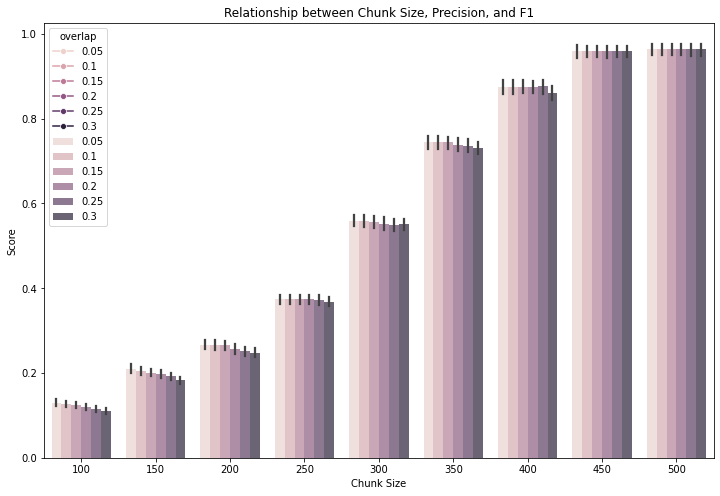

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.lineplot(data=df, x='chunk_size', y='precision', hue='overlap', marker='o')

sns.barplot(data=df, x='chunk_size', y='precision', hue='overlap', alpha=0.7)

plt.title('Relationship between Chunk Size, Precision, and F1')
plt.xlabel('Chunk Size')
plt.ylabel('Score')
plt.show()


In [50]:
import plotly.express as px

fig = px.scatter(df, x='embedding_dim', y='precision', size='chunk_size', color='model',
                 labels={'accuracy': 'Accuracy'},
                 title='Bubble Chart: Embedding Dim, Chunk Size, and Accuracy')
fig.show()


<AxesSubplot:xlabel='embedding_dim', ylabel='chunk_size'>

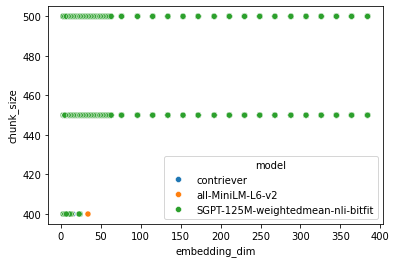

In [51]:
threshold = 0.98
sns.scatterplot(data=df[(df['precision'] >= threshold)], x='embedding_dim', y='chunk_size', hue='model')


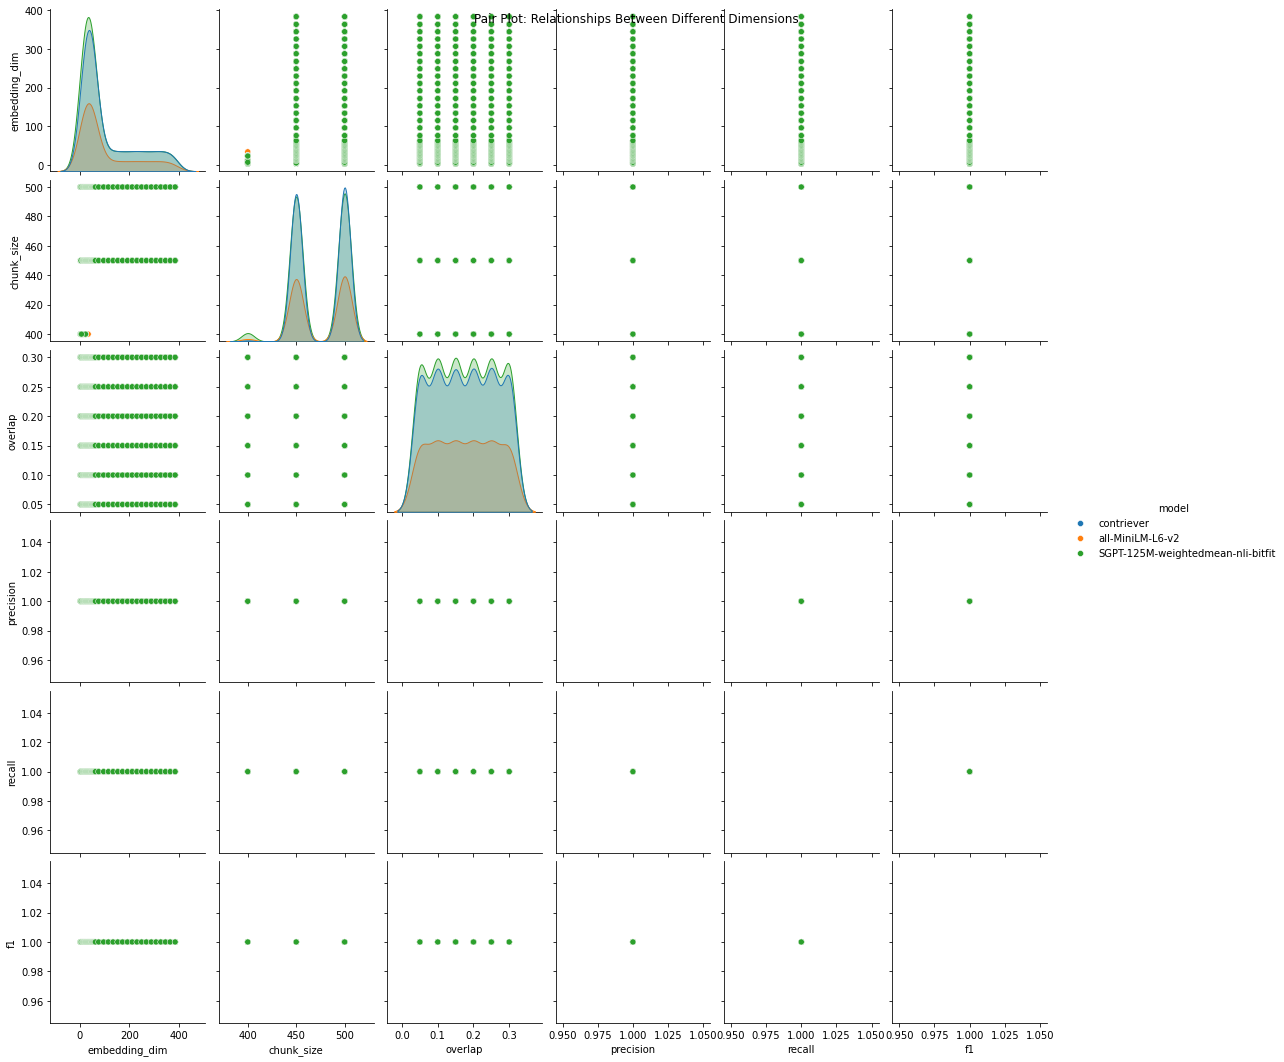

In [52]:
trec_covid_contriever
df = df[df['f1'] > 0.99]
sns.pairplot(df, vars=['embedding_dim', 'chunk_size', 'overlap', 'precision', 'recall', 'f1'], hue='model')
plt.suptitle('Pair Plot: Relationships Between Different Dimensions')
plt.show()


In [53]:

unique_models = np.unique(df['model'])

mean_accuracies = {}

for model in unique_models:
    model_df = df[df['model'] == model]
    
    mean_accuracy = model_df['f1'].mean() #model_df['accuracy'].mean()
    mean_accuracies[model] = mean_accuracy

best_model = max(mean_accuracies, key=mean_accuracies.get)

for model, mean_accuracy in mean_accuracies.items():
    print(f"Model: {model}, Mean Accuracy: {mean_accuracy}")

print(f"\nBest-Performing Model Overall: {best_model} with Mean Accuracy: {mean_accuracies[best_model]}")


Model: SGPT-125M-weightedmean-nli-bitfit, Mean Accuracy: 1.0
Model: all-MiniLM-L6-v2, Mean Accuracy: 1.0
Model: contriever, Mean Accuracy: 1.0

Best-Performing Model Overall: SGPT-125M-weightedmean-nli-bitfit with Mean Accuracy: 1.0


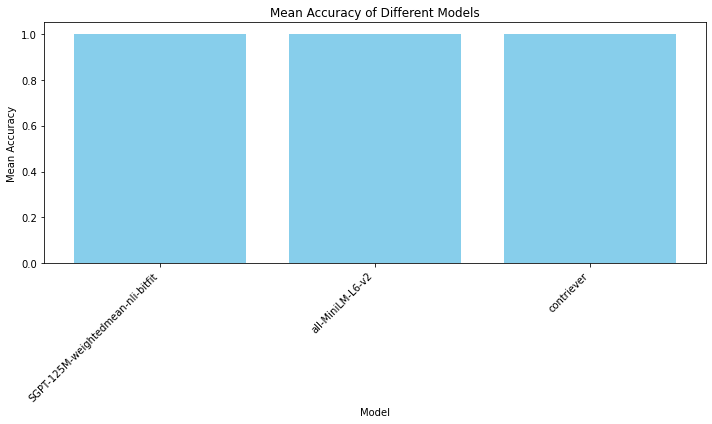

Mean Accuracies Table:
                               Model  Mean Accuracy
0  SGPT-125M-weightedmean-nli-bitfit            1.0
1                   all-MiniLM-L6-v2            1.0
2                         contriever            1.0

Best-Performing Model Overall: SGPT-125M-weightedmean-nli-bitfit with Mean Accuracy: 1.0


In [54]:
import matplotlib.pyplot as plt
import pandas as pd

df_mean_accuracies = pd.DataFrame(list(mean_accuracies.items()), columns=['Model', 'Mean Accuracy'])


plt.figure(figsize=(10, 6))
plt.bar(df_mean_accuracies['Model'], df_mean_accuracies['Mean Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Mean Accuracies Table:")
print(df_mean_accuracies)

# Identify the best-performing model
best_model = max(mean_accuracies, key=mean_accuracies.get)
print(f"\nBest-Performing Model Overall: {best_model} with Mean Accuracy: {mean_accuracies[best_model]}")
